In [1]:
import pandas as pd
import numpy as np

# Choose Asset: Multi-asset & Multi-currency

In [2]:
#US Equity Tickers
EquityUSD = ['XLY', 'XLI', 'XLF', 'XLV', 'XLK', 'XLP']
EquityNamesUSD = ['Consumer Discretionary', 'Industrial', 'Financial', 'Health Care', 'Technology', 'Consumer Staples']

#CAD Equity Tickers
EquityCAD = ['XMD.TO', 'XFN.TO', 'ZUH.TO', 'XIT.TO', 'ZDJ.TO']
EquityNamesCAD = ['Mid_Small_CAD', 'Financial_CAD', 'Health Care_CAD', 'Information Technology_CAD', 'DJI_CAD']

#US Credit Tickers
CreditUSD = ['EMB', 'HYG', 'LQD', 'MBB']
CreditNamesUSD = ['Emerging Markets', 'High Yield', 'Investment Grade', 'Mortgage Backed Securities']

#CAD Credit Tickers
CreditCAD = ['ZEF.TO', 'XHY.TO', 'ZCS.TO', 'XQB.TO']
CreditNamesCAD = ['Emerging Markets_CAD', 'High Yield_CAD', 'Corporate Bonds_CAD', 'Investment Grade_CAD']

#US Alternatives Tickers
AltsUSD = ['PSP', 'IGF', 'VNQ', 'MNA']
AltsNamesUSD = ['PE', 'Infra', 'REITs', 'HF']

#CAD Alternatives Tickers
AltsCAD = ['CGR.TO', 'CIF.TO']
AltsNamesCAD = ['REITs_CAD', 'Infra_CAD']

In [3]:
data_list = EquityUSD + EquityCAD + CreditUSD + CreditCAD + AltsUSD + AltsCAD + ['SPY', 'CAD=X', '^IRX']

stocksUSD = EquityUSD + CreditUSD + AltsUSD
stocksCAD = EquityCAD + CreditCAD + AltsCAD

# Data Processing

In [4]:
def read_data_based_on_list(data_list):
    df_list = []
    for data_name in data_list:
        data = pd.read_csv('./data/' + data_name + '.csv')
        data = data[['Date','Adj Close']]
        data = data.dropna()
        df_list.append(data)
        
    df_mod = df_list[0]
    for i in df_list[1:]:
        df_mod = pd.merge(df_mod,i,on='Date')
    df_mod.columns = ['Date'] + data_list
    df_mod.index = df_mod['Date']
    df_mod = df_mod.drop(columns='Date')
    
    return df_mod

In [5]:
stocksUSD_df = read_data_based_on_list(stocksUSD)
stocksUSD_df

,XLY,XLI,XLF,XLV,XLK,XLP,EMB,HYG,LQD,MBB,PSP,IGF,VNQ,MNA
Date,,,,,,,,,,,,,,
2011-01-03,32.762367,28.434832,10.894097,26.534359,21.575010,22.107552,66.454269,50.208138,75.928116,83.012985,5.409481,24.933517,37.158657,23.647411
2011-01-04,32.580624,28.394358,10.880730,26.617821,21.659719,22.047304,66.862152,50.435951,76.025803,83.012985,5.389595,24.884060,36.447094,23.924492
2011-01-05,32.848930,28.540087,11.007719,26.676247,21.786779,22.054832,66.479027,50.563759,75.467789,82.634979,5.419426,24.693295,36.578876,23.962706
2011-01-06,32.649857,28.491512,10.934199,26.784758,21.913839,21.979506,65.966072,50.624878,75.579422,82.745270,5.374679,24.544926,36.236275,23.828947
2011-01-07,32.632545,28.548174,10.840630,26.768059,21.812191,21.866516,66.102036,50.430374,75.963020,83.060165,5.359762,24.481335,36.249451,23.981817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,170.507065,103.044151,37.232517,123.627563,138.396286,70.790184,111.140091,86.640556,131.564102,108.354561,15.144831,46.186584,98.369972,33.349998
2021-05-26,172.134659,103.373100,37.342083,122.910362,138.386322,70.641151,111.130150,86.670349,131.494354,108.244789,15.202746,46.206303,98.806862,33.290001
2021-05-27,172.823639,104.788635,37.770382,122.641411,137.657654,70.203995,110.921486,86.630615,131.095886,108.095100,15.308924,46.068283,98.578484,33.320000


In [6]:
stocksCAD_df = read_data_based_on_list(stocksCAD)
stocksCAD_df

,XMD.TO,XFN.TO,ZUH.TO,XIT.TO,ZDJ.TO,ZEF.TO,XHY.TO,ZCS.TO,XQB.TO,CGR.TO,CIF.TO
Date,,,,,,,,,,,
2011-01-04,18.567413,16.391014,15.994843,7.760792,16.650757,9.820591,11.152819,10.585264,15.138702,13.087293,13.925014
2011-01-05,18.503286,16.412386,16.033201,7.854295,16.724792,9.729662,11.174260,10.549852,15.131192,13.178388,13.871219
2011-01-06,18.326914,16.362516,16.071558,7.864684,16.683664,9.662977,11.190337,10.549852,15.093642,12.943055,13.832796
2011-01-07,18.294844,16.419498,15.985254,7.812738,16.634304,9.675105,11.142106,10.578177,15.138702,12.882329,13.817426
2011-01-10,18.294844,16.319767,15.994843,7.781570,16.601402,9.662977,11.120663,10.571099,15.146209,12.905106,13.609935
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26,30.247566,46.209595,76.000000,46.088509,54.981285,15.280032,18.746546,14.364902,20.948278,29.822018,29.410223
2021-05-27,30.416992,46.399139,76.089996,45.908554,55.300076,15.290000,18.766468,14.354927,20.918337,29.782253,29.370678
2021-05-28,30.486755,46.518856,76.330002,45.848572,55.409660,15.290000,18.746546,14.354927,20.928318,29.931366,29.499195


In [7]:
def get_prices_and_returns(df):
#     df = df.drop(columns=['CAD=X', '^IRX'])
    df = df.dropna()
    log_return = np.log(df).diff().dropna()
    return df, log_return

In [8]:
priceUSD, rtnUSD = get_prices_and_returns(stocksUSD_df)
priceCAD, rtnCAD = get_prices_and_returns(stocksCAD_df)

# Portfolio Construction

In [9]:
import utilityFuncs

100%|██████████| 1620/1620 [00:05<00:00, 271.90it/s]


Return:  0.079
Std.:  0.076
Sharpe Ratio:  1.049


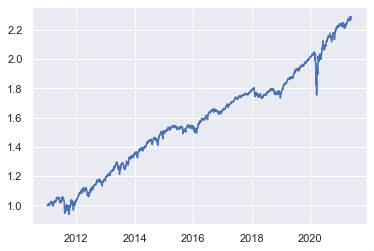

100%|██████████| 1613/1613 [00:06<00:00, 263.29it/s]


Return:  0.07
Std.:  0.074
Sharpe Ratio:  0.945


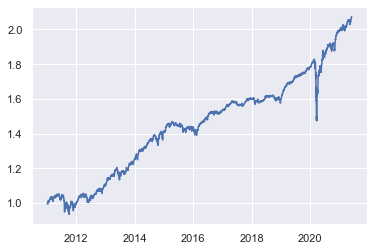

In [10]:
rtnUSD, valueUSD, weightUSD, rtnBreakDownUSD = \
    utilityFuncs.make_portfolio(priceUSD, EquityUSD, CreditUSD, AltsUSD, True)
rtnCAD, valueCAD, weightCAD, rtnBreakDownCAD = \
    utilityFuncs.make_portfolio(priceCAD, EquityCAD, CreditCAD, AltsCAD, True)

In [11]:
commonDate = list(read_data_based_on_list(data_list).index)
# put 55.6% into US market and 44.4% into Canadian market
weightMerged = pd.concat([weightUSD.loc[commonDate] * 0.556, weightCAD.loc[commonDate] * 0.444], axis=1)
weightMerged.to_pickle('weights.pkl')
weightMerged

,XLY,XLI,XLF,XLV,XLK,XLP,EMB,HYG,LQD,MBB,...,XFN.TO,ZUH.TO,XIT.TO,ZDJ.TO,ZEF.TO,XHY.TO,ZCS.TO,XQB.TO,CGR.TO,CIF.TO
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,0.041700,0.041700,0.041700,0.041700,0.041700,0.041700,0.062550,0.062550,0.062550,0.062550,...,0.039960,0.039960,0.039960,0.039960,0.049950,0.049950,0.049950,0.049950,0.022200,0.022200
2011-01-05,0.041700,0.041700,0.041700,0.041700,0.041700,0.041700,0.062550,0.062550,0.062550,0.062550,...,0.039960,0.039960,0.039960,0.039960,0.049950,0.049950,0.049950,0.049950,0.022200,0.022200
2011-01-06,0.041700,0.041700,0.041700,0.041700,0.041700,0.041700,0.062550,0.062550,0.062550,0.062550,...,0.039960,0.039960,0.039960,0.039960,0.049950,0.049950,0.049950,0.049950,0.022200,0.022200
2011-01-07,0.041700,0.041700,0.041700,0.041700,0.041700,0.041700,0.062550,0.062550,0.062550,0.062550,...,0.039960,0.039960,0.039960,0.039960,0.049950,0.049950,0.049950,0.049950,0.022200,0.022200
2011-01-10,0.041700,0.041700,0.041700,0.041700,0.041700,0.041700,0.062550,0.062550,0.062550,0.062550,...,0.039960,0.039960,0.039960,0.039960,0.049950,0.049950,0.049950,0.049950,0.022200,0.022200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,0.006201,0.022511,0.005225,0.028666,0.005322,0.034459,0.072720,0.022805,0.020705,0.281787,...,0.037073,0.008764,0.008499,0.008029,0.080269,0.019325,0.032141,0.165025,0.035788,0.008612
2021-05-26,0.006201,0.022511,0.005225,0.028665,0.005322,0.034458,0.072700,0.022808,0.020702,0.281809,...,0.037085,0.008767,0.008501,0.008031,0.080269,0.019336,0.032136,0.164980,0.035785,0.008615
2021-05-27,0.006201,0.022510,0.005224,0.028661,0.005321,0.034454,0.072689,0.022798,0.020701,0.281841,...,0.037081,0.008768,0.008500,0.008032,0.080269,0.019337,0.032134,0.164988,0.035785,0.008615


In [12]:
from datetime import datetime, date, timedelta

In [13]:
# Rebalancing

# get approximate rebalancing dates
rebalancing_temp = [] 
year = 2016

for i in range(6):
    rebalancing_temp.append(date(year + i, 4, 1))
    rebalancing_temp.append(date(year + i, 10, 1))
rebalancing_temp.pop()  # remove 2021-10-01

# get exact rebalancing dates
rebalancing = []

for rebalance_date in rebalancing_temp:
    while not rebalance_date.strftime('%Y-%m-%d') in commonDate:
        rebalance_date = rebalance_date + timedelta(days=1)
    rebalancing.append(rebalance_date)

rebalancing_date_str = [dt.strftime('%Y-%m-%d') for dt in rebalancing]
rebalancing_date_str

['2016-04-01',
 '2016-10-03',
 '2017-04-03',
 '2017-10-02',
 '2018-04-02',
 '2018-10-01',
 '2019-04-01',
 '2019-10-08',
 '2020-04-01',
 '2020-10-01',
 '2021-04-01']

In [14]:
rebalanceMask = []
for i in list(weightMerged.index):
    if i in (rebalancing_date_str):
        rebalanceMask.append(True)
    else:
        rebalanceMask.append(False)

In [15]:
ERCWeight = weightMerged.loc[rebalanceMask]
ERCWeight

,XLY,XLI,XLF,XLV,XLK,XLP,EMB,HYG,LQD,MBB,...,XFN.TO,ZUH.TO,XIT.TO,ZDJ.TO,ZEF.TO,XHY.TO,ZCS.TO,XQB.TO,CGR.TO,CIF.TO
Date,,,,,,,,,,,,,,,,,,,,,
2016-04-01,0.007416,0.029437,0.027341,0.007817,0.029832,0.010245,0.020955,0.107486,0.028112,0.231760,...,0.008643,0.007445,0.006525,0.032253,0.011131,0.014500,0.184308,0.100326,0.008532,0.035868
2016-10-03,0.006980,0.006937,0.025569,0.007097,0.028077,0.037628,0.086157,0.028029,0.028749,0.245176,...,0.008697,0.007113,0.006519,0.031847,0.010707,0.014337,0.187060,0.098395,0.008566,0.035834
2017-04-03,0.007243,0.028704,0.006575,0.029142,0.007317,0.039611,0.020046,0.026996,0.110975,0.223790,...,0.008712,0.007278,0.006970,0.032675,0.010039,0.014077,0.189110,0.095854,0.008567,0.035833
2017-10-02,0.025210,0.024766,0.005649,0.006282,0.006076,0.035047,0.021719,0.111482,0.028146,0.236021,...,0.028991,0.006101,0.005990,0.006891,0.011313,0.015678,0.196927,0.097822,0.008670,0.035730
2018-04-02,0.006045,0.023571,0.005310,0.024063,0.005563,0.033563,0.021376,0.107565,0.027611,0.245733,...,0.028183,0.005778,0.005662,0.006258,0.012514,0.068371,0.216054,0.028024,0.008820,0.035580
2018-10-01,0.006171,0.005963,0.021584,0.024565,0.005588,0.033648,0.020897,0.026896,0.109771,0.245317,...,0.027503,0.005575,0.005418,0.005971,0.011287,0.015568,0.199158,0.101062,0.008684,0.035716
2019-04-01,0.005380,0.005336,0.020048,0.022478,0.004714,0.032011,0.022047,0.027349,0.113099,0.247938,...,0.006968,0.019875,0.004821,0.005424,0.011940,0.016232,0.201236,0.104649,0.008482,0.035918
2019-10-08,0.005286,0.020838,0.004898,0.023403,0.004561,0.032679,0.021011,0.027103,0.111152,0.249469,...,0.007322,0.020108,0.004683,0.005502,0.054446,0.019062,0.227048,0.030274,0.035383,0.009017
2020-04-01,0.007266,0.026285,0.024267,0.007968,0.006088,0.038692,0.077214,0.027286,0.023061,0.262274,...,0.038342,0.009183,0.008986,0.008456,0.098531,0.100704,0.039801,0.052640,0.035503,0.008897


In [16]:
priceMerged = pd.concat([priceUSD.loc[commonDate], priceCAD.loc[commonDate]], axis=1)

portfolioValue = priceMerged.loc['2016-04-01':'2021-06-01'].dropna()
portfolioValue = portfolioValue[ERCWeight.columns]

price = priceMerged.loc['2016-04-01':'2021-06-01'].dropna()
price = price[ERCWeight.columns]

In [17]:
# Back-testing

investment = []  # principal amount
cash = []  # cash available
start = 90000  # initial fund for investing in main portfolio

fxData = read_data_based_on_list(['CAD=X'])

usdTickers = [i for i in list(price.columns) if (i[-2:] != "TO")]
cadTickers =  list(set(portfolioValue.columns) - set(usdTickers))

for i in range(len(ERCWeight)):

    rebalanceDate = ERCWeight.index[i]

    # Finding start and end date for a rebalancing period.  
    try:
        endDate = datetime.strptime(ERCWeight.index[i + 1], '%Y-%m-%d').date() - timedelta(days=1)     
    except:
        endDate = date(2021, 6, 1)

    relevantData = portfolioValue[rebalanceDate:endDate.strftime('%Y-%m-%d')]
    
    rebalanceDate = relevantData.index[0]
    endDate = relevantData.index[-1]

    # Money Allocated to each of the asset in CAD
    moneyAllocated = start * ERCWeight.iloc[i]

    # Finding FX rate on first day and converting the USD prices to CAD
    try:
        fxConvert = fxData.loc[rebalanceDate]
    except:
        fxConvert = fxData.loc[rebalanceDate.date() - timedelta(days=1)]

    priceinCAD = price.copy().loc[rebalanceDate]
    priceinCAD[usdTickers] *= fxConvert.values

    # Number of Units to buy for each asset in each period
    units = moneyAllocated.divide(priceinCAD)

    # Adding all the values and evolution of value for each asset in a period.
    portfolioValue[rebalanceDate:endDate] = portfolioValue[rebalanceDate:endDate] * list(units)
    investment.extend([100000 + (i * 10000)] * len(portfolioValue[rebalanceDate:endDate]))
    cash.extend([10000 + (i * 1000)] * len(portfolioValue[rebalanceDate:endDate]))

    # Figuring out the value of portfolio on the last day in CAD for reinvesting next period
    priceinCAD = portfolioValue.copy().loc[endDate]

    try:
        fxConvert = fxData.loc[endDate]
    except:
        fxConvert = fxData.loc[endDate.date() - timedelta(days=1)]

    priceinCAD[usdTickers] *= fxConvert.values
    endvalue = priceinCAD.sum()

    # 9000 to be added in the next rebalancing period.
    start = 9000 + endvalue

In [18]:
# Adding the column for cash in the dataframe
portfolioValue["Cash"] = cash

# Performance Analysis and Metrics Calculation

In [19]:
import metricsCalculator
from importlib import reload

In [20]:
# Adding some more columns for performance analysis
portfolioValue["USDTickers"] = portfolioValue[usdTickers].sum(axis=1)
portfolioValue["CADTickers"] = portfolioValue[cadTickers].sum(axis=1)

portfolioValue = portfolioValue.merge(fxData, left_index=True, right_index=True)
portfolioValue["USDTickers_CAD"] = portfolioValue["USDTickers"].multiply(portfolioValue["CAD=X"])
    
portfolioValue["Principal"] = investment
portfolioValue["Value_CAD"] = portfolioValue["CADTickers"] + portfolioValue["USDTickers_CAD"] + portfolioValue["Cash"]

rebalancing = portfolioValue[~portfolioValue['Principal'].diff().isin([0])].index

portfolioValue["Return"] = portfolioValue["Value_CAD"].pct_change()
portfolioValue.loc[list(portfolioValue.loc[portfolioValue.index.isin(rebalancing)][1:].index),'Return'] = (portfolioValue.loc[list(portfolioValue.loc[portfolioValue.index.isin(rebalancing)][1:].index),'Value_CAD'])/((portfolioValue.shift(1).loc[list(portfolioValue.loc[portfolioValue.index.isin(rebalancing)][1:].index),'Value_CAD'])+10000)-1
portfolioValue

,XLY,XLI,XLF,XLV,XLK,XLP,EMB,HYG,LQD,MBB,...,CGR.TO,CIF.TO,Cash,USDTickers,CADTickers,CAD=X,USDTickers_CAD,Principal,Value_CAD,Return
Date,,,,,,,,,,,,,,,,,,,,,
2016-04-01,513.773884,2039.392970,1894.211899,541.536175,2066.806680,709.777204,1451.788500,7446.689239,1947.617817,16056.550291,...,767.888125,3228.111875,10000,38520.160732,39960.000000,1.29906,50040.000000,100000,100000.000000,NaN
2016-04-04,509.763530,2016.339222,1885.032549,548.014105,2058.946500,710.041950,1451.393567,7428.382067,1947.782076,16072.722549,...,770.315482,3207.855471,10000,38474.984340,39920.269943,1.30360,50155.989586,100000,100076.259529,0.000763
2016-04-05,505.429871,2003.897173,1858.329991,540.904260,2039.064513,705.276725,1447.573200,7400.927873,1954.008398,16072.722549,...,773.012805,3213.642401,10000,38319.297433,39922.576073,1.30767,50108.995674,100000,100031.571747,-0.000447
2016-04-06,510.216358,2013.777681,1868.344148,555.439890,2058.946500,710.836221,1450.997878,7463.163688,1952.369326,16065.370689,...,775.440069,3203.514613,10000,38453.872017,39970.477660,1.31412,50533.002295,100000,100503.479955,0.004718
2016-04-07,504.459671,1994.382606,1833.296592,549.357143,2029.354710,703.158645,1445.070575,7426.552209,1957.612568,16074.189919,...,769.776080,3187.598738,10000,38321.270172,39874.801383,1.30808,50127.287086,100000,100002.088469,-0.004989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,1244.109525,4670.518723,4476.976012,1511.380715,1083.239065,7167.922169,14006.121368,4302.502080,3936.263070,52575.285270,...,8552.114663,2001.640120,20000,105552.151426,105268.055400,1.20498,127188.231425,200000,252456.286825,0.002148
2021-05-26,1255.985309,4685.428472,4490.150634,1502.612737,1083.161076,7152.831702,14004.868582,4303.981577,3934.176281,52522.022222,...,8641.409269,2016.552415,20000,105506.266243,105608.270831,1.20640,127282.759595,200000,252891.030426,0.001722
2021-05-27,1261.012471,4749.588181,4541.650895,1499.324737,1077.457732,7108.567088,13978.572280,4302.008418,3922.254527,52449.390836,...,8629.886720,2013.840958,20000,105462.735513,105649.117721,1.21301,127927.352804,200000,253576.470525,0.002710


In [21]:
reload(metricsCalculator)
print ("###################Portfolio Stats##################")
print ()
equityTickers = EquityUSD + EquityCAD
creditTickers = CreditUSD + CreditCAD
altsTickers = AltsUSD + AltsCAD

metricsCalculator.get_stats(portfolioValue, rebalancing)

###################Portfolio Stats##################

Correlation to SP500:  0.709
Kurtosis:  31.393
Skewness:  -1.134
Volatility:  6.828
Sharpe Ratio:  0.844
Max Drawdown in %:  -10.515
CAGR in %:  6.133
Sortino Ratio:  1.329

[- VaR Calculations -]
99% 1 day VaR:  0.97 % or $ 2469
99% 1 day CVaR/ES:  1.12 % or $ 2838
99% 10 day VaR:  2.9 % or $ 7346
99% 10 day CVaR/ES:  3.36 % or $ 8514

[- Returns - Period Wise -]
Period 1 :  4.85 %
Period 2 :  12.62 %
Period 3 :  6.77 %
Period 4 :  10.05 %
Period 5 :  10.65 %
Period 6 :  12.72 %
Period 7 :  8.47 %
Period 8 :  4.42 %
Period 9 :  16.54 %
Period 10 :  6.89 %
Time Weighted Return: 144.16368207555496 %


In [22]:
# Transaction Costs
metricsCalculator.transactionCost(portfolioValue, rebalancing)

Transaction Costs: $ 574.47


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

###################Benchmark Comparison##################


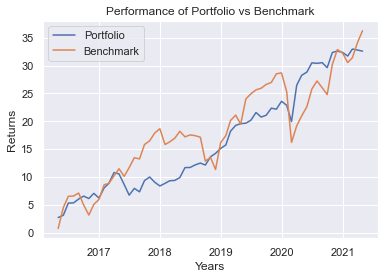

Tracking Error:  0.068
Information Ratio:  -0.149
Beta: 0.15
Alpha: 3.462


In [24]:
reload(metricsCalculator)
print ("###################Benchmark Comparison##################")
benchmarkData = metricsCalculator.benchmarkComp(portfolioValue)

                           Strategy
-------------------------  ----------
Start Period               2016-04-04
End Period                 2021-06-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          36.03%
CAGR%                      6.14%

Sharpe                     0.95
Sortino                    1.33
Sortino/√2                 0.94

Max Drawdown               -10.51%
Longest DD Days            403
Volatility (ann.)          6.83%
Calmar                     0.58
Skew                       -1.14
Kurtosis                   31.52

Expected Daily %           0.02%
Expected Monthly %         0.49%
Expected Yearly %          5.26%
Kelly Criterion            9.5%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.68%
Expected Shortfall (cVaR)  -0.68%

Gain/Pain Ratio            0.21
Gain/Pain (1M)             2.06

Payoff Ratio               1.03
Profit Factor              1.21
Common Sense Ratio         1.38
CPC Index                  

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-24,2020-03-18,2020-04-09,45,-10.514742,-10.078288
2,2017-05-08,2017-09-08,2018-06-15,403,-5.555625,-5.258595
3,2020-06-09,2020-06-11,2020-07-15,36,-3.069610,-2.073377
4,2021-04-22,2021-05-12,2021-06-01,40,-2.836583,-2.464534
5,2020-08-11,2020-09-23,2020-11-11,92,-2.373894,-2.336803


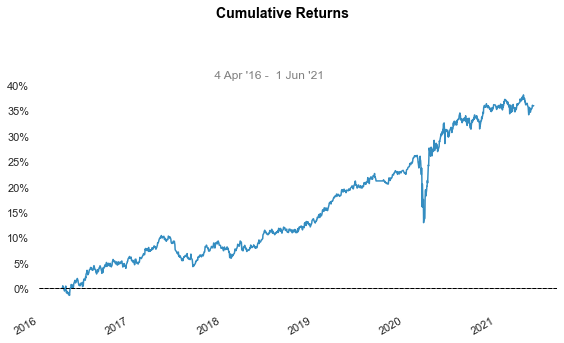

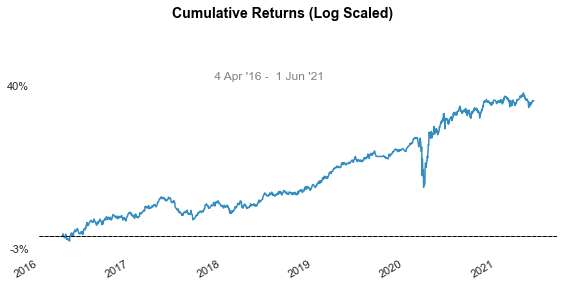

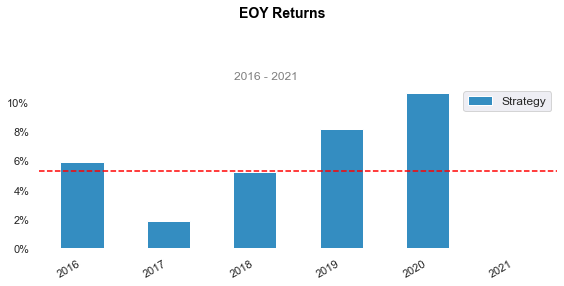

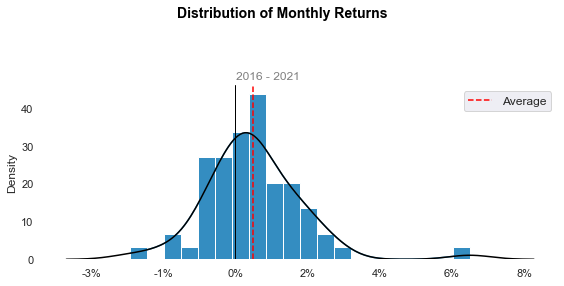

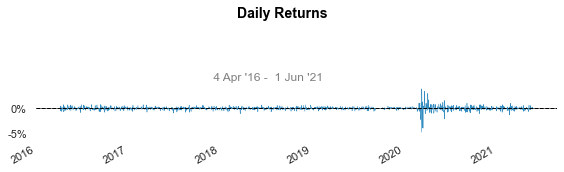

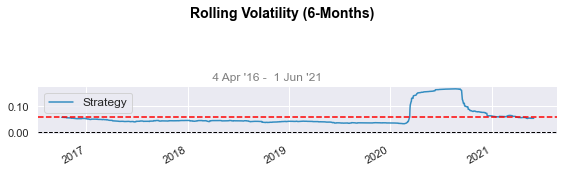

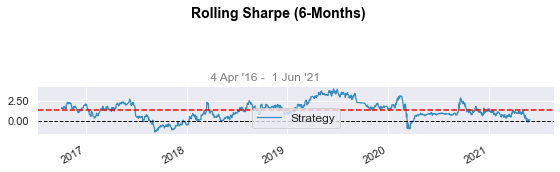

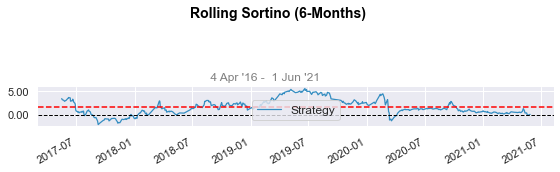

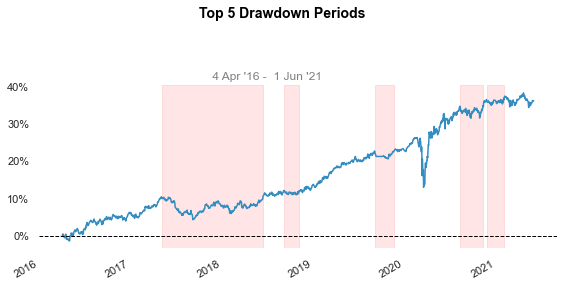

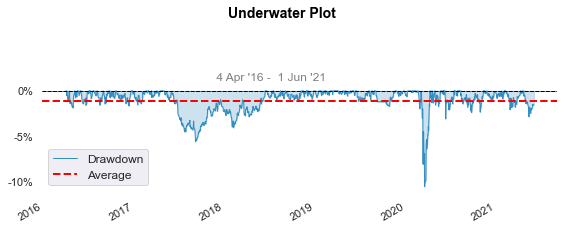

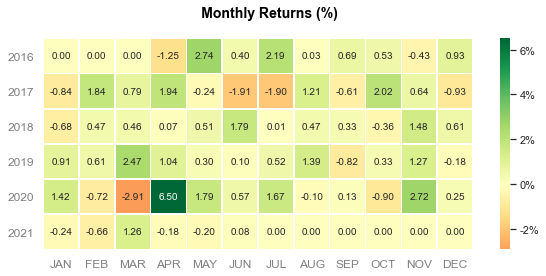

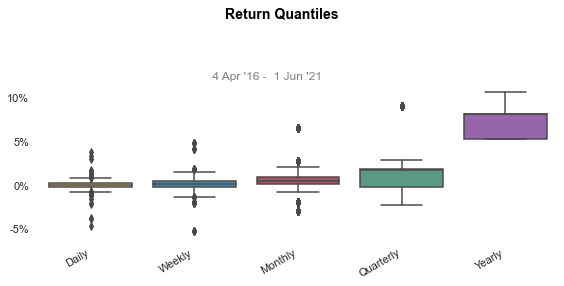

In [25]:
reload(metricsCalculator)
#Generate graphs for the portfolio
returnData = portfolioValue.Return.dropna()
returnData.index = pd.to_datetime(returnData.index)
metricsCalculator.portfolioGraphsandStats(returnData)

###################Evolution of USD/CAD Exposure##################


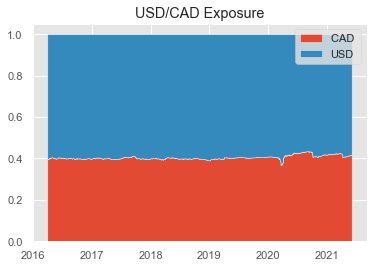

In [26]:
reload(metricsCalculator)
print ("###################Evolution of USD/CAD Exposure##################")
reload(metricsCalculator)
plt.style.use("ggplot")
metricsCalculator.usdcadExposures(portfolioValue)
sns.set()

###################Evolution of Asset Classes Weights##################


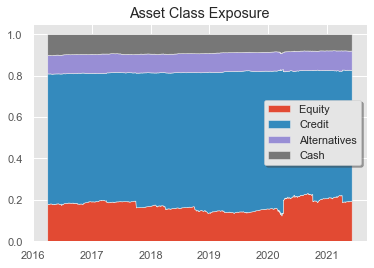

In [27]:
reload(metricsCalculator)
print ("###################Evolution of Asset Classes Weights##################")
plt.style.use("ggplot")
metricsCalculator.weightsEvolution(portfolioValue, EquityUSD, EquityCAD, CreditUSD, CreditCAD, AltsUSD, AltsCAD)
sns.set()

In [28]:
reload(metricsCalculator)
equityTickers = EquityUSD + EquityCAD
creditTickers = CreditUSD + CreditCAD
altsTickers = AltsUSD + AltsCAD
metricsCalculator.nvCalculator(portfolioValue, len(portfolioValue) - 1, \
                               equityTickers, creditTickers, altsTickers, \
                               EquityNamesUSD, EquityNamesCAD, \
                               CreditNamesUSD, CreditNamesCAD, \
                               AltsNamesUSD, AltsNamesCAD)

##################Exposures#########################
Date:  2021-06-01
Portfolio Value:  253442

Equity Exposure:  45549.0
Consumer Discretionary        1257.0
Industrial                    4768.0
Financial                     4578.0
Health Care                   1480.0
Technology                    1076.0
Consumer Staples              7100.0
Mid_Small_CAD                 9908.0
Financial_CAD                 9293.0
Health Care_CAD               2114.0
Information Technology_CAD    2010.0
DJI_CAD                       1965.0

Credit Exposure:  144639.0
Emerging Markets              14026.0
High Yield                     4313.0
Investment Grade               3926.0
Mortgage Backed Securities    52463.0
Emerging Markets_CAD          18995.0
High Yield_CAD                 4588.0
Corporate Bonds_CAD            7535.0
Investment Grade_CAD          38793.0

Alternatives Exposure:  21477.0
PE            607.0
Infra        2460.0
REITs         572.0
HF           7050.0
REITs_CAD    8748.0
Infra

###################Exposures###################
                  Weight
Equity_USD          8.74
Credit_USD         32.26
Alternative_USD     4.61
Equity_CAD         10.92
Credit_CAD         30.18
Alternatives_CAD    4.66
Cash                8.63


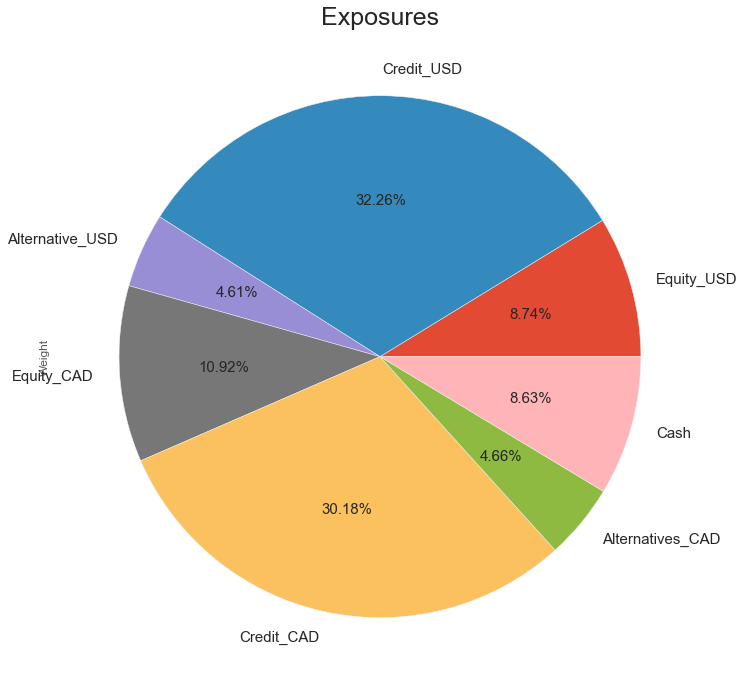

In [29]:
reload(metricsCalculator)
plt.style.use("ggplot")
print("###################Exposures###################")
exposure = metricsCalculator.getExposure(portfolioValue, EquityUSD, EquityCAD, \
                                         CreditUSD, CreditCAD, AltsUSD, AltsCAD, '2021-06-01')
print(round(exposure * 100, 2))
exposure['Weight'].plot.pie(autopct='%.2f%%', fontsize=15, figsize=(12, 12))
plt.title("Exposures", fontsize=25)
plt.show()
sns.set()

###################Return Attribution###################
                 Return Attribution
US Equity                     24.26
CAD Equity                    26.00
US Credit                     19.34
CAD Credit                    19.55
US Alternative                 6.16
CAD Alternative                4.69


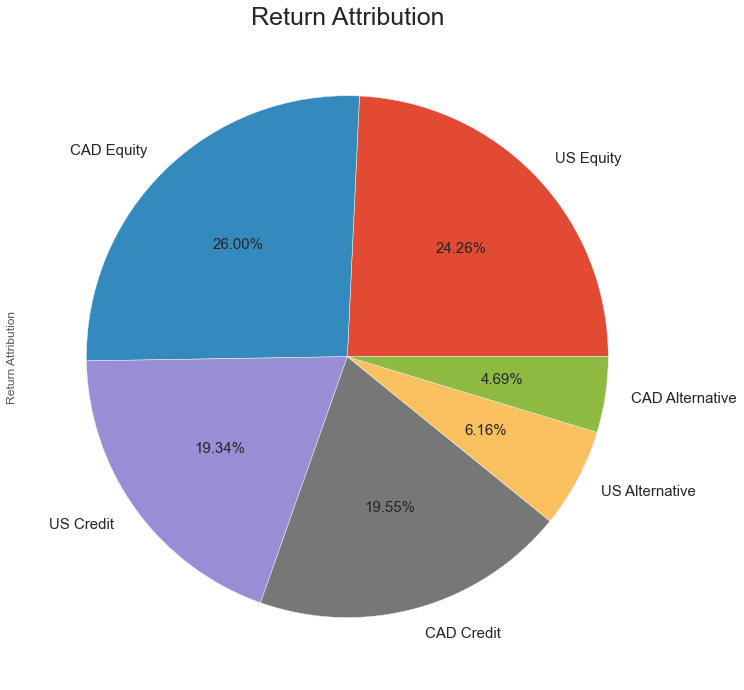

In [30]:
reload(metricsCalculator)
plt.style.use("ggplot")
print("###################Return Attribution###################")
returnAttribution = metricsCalculator.getReturnAttribution(portfolioValue, rebalancing, \
                                                           EquityUSD, EquityCAD, \
                                                           CreditUSD, CreditCAD, \
                                                           AltsUSD,AltsCAD)
returnAttribution = (round((returnAttribution/returnAttribution.sum()) * 100, 2))
returnAttribution = pd.DataFrame(returnAttribution)
returnAttribution.columns=["Return Attribution"]
print(returnAttribution)
returnAttribution["Return Attribution"].plot.pie(autopct='%.2f%%', fontsize=15, figsize=(12, 12))
plt.title("Return Attribution",fontsize=25)
plt.show()
sns.set()

###################Risk Attribution###################
                 Risk Attribution
US Equity                   19.59
US Credit                   17.38
US Alternative               7.31
CAD Equity                  24.98
CAD Credit                  21.34
CAD Alternative              9.40


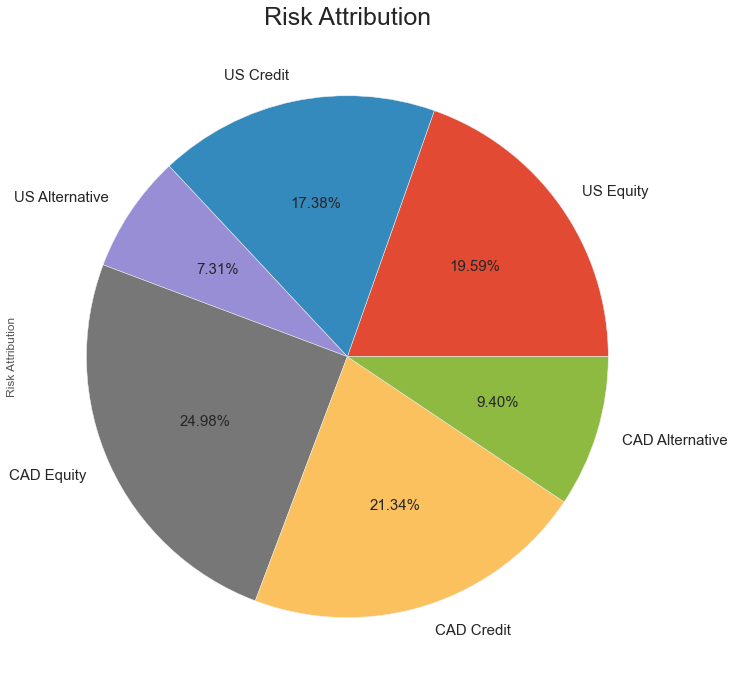

In [31]:
reload(metricsCalculator)
plt.style.use("ggplot")
print("###################Risk Attribution###################")
riskAttribution = metricsCalculator.getRiskAttribution(rtnBreakDownUSD, rtnBreakDownCAD, exposure)
print(round(riskAttribution * 100, 2))
riskAttribution["Risk Attribution"].plot.pie(autopct='%.2f%%', fontsize=15, figsize=(12, 12))
plt.title("Risk Attribution",fontsize=25)
plt.show()
sns.set()

# Risk Model

In [32]:
import riskModel

## Scenario Analysis

In [33]:
reload(riskModel)
portReturns = benchmarkData.Port_Returns.dropna()
upScenario, downScenario, simup, simdown = riskModel.getResults(benchmarkData, portfolioValue, \
                                                                AltsUSD, CreditUSD, EquityUSD, \
                                                                AltsCAD, CreditCAD, EquityCAD)

/Users/tianranlilili/opt/anaconda3/lib/python3.8/site-packages/copulas/multivariate/vine.py:68: UserWarning: Vines have not been fully tested on Python 3.8 and might produce wrong results. Please use Python 3.5, 3.6 or 3.7
  warnings.warn(


In [34]:
# Factor-shocking Model: Up
upScenario = upScenario.drop(["constant"], axis=1)
upScenario["Value"] = upScenario["Portfolio Estimated Return"] * portfolioValue.iloc[-1].Value_CAD
upScenario["Portfolio Estimated Return"] = upScenario["Portfolio Estimated Return"] * 100

utilityFuncs.printFunction(round(upScenario, 2))

   Industrial ProdGrowth  Credit Premium  Yield spread  Yield Curve PCA  \
0                   0.09            0.79          0.94             1.11   
0                   2.00            0.79          0.94             1.11   
0                   0.09            2.00          0.94             1.11   
0                   0.09            0.79          1.00             1.11   
0                   0.09            0.79          0.94            -3.00   
0                   2.00            2.00          1.00            -3.00   

   SP500 Return  Portfolio Estimated Return     Value  
0          0.15                        2.54   6443.78  
0          0.02                        0.47   1201.31  
0          0.02                        2.50   6344.52  
0          0.02                        0.58   1457.90  
0          0.02                        0.29    723.51  
0          0.15                        4.09  10363.22  


In [35]:
# Factor-shocking Model: Down
downScenario = downScenario.drop(["constant"], axis=1)
downScenario["Value"] = downScenario["Portfolio Estimated Return"] * portfolioValue.iloc[-1].Value_CAD
downScenario["Portfolio Estimated Return"] = downScenario["Portfolio Estimated Return"] * 100

utilityFuncs.printFunction(round(downScenario, 2))

   Industrial ProdGrowth  Credit Premium  Yield spread  Yield Curve PCA  \
0                   0.09            0.79          0.94             1.11   
0                 -10.00            0.79          0.94             1.11   
0                   0.09           -2.00          0.94             1.11   
0                   0.09            0.79         -2.00             1.11   
0                   0.09            0.79          0.94             1.00   
0                 -10.00           -2.00         -2.00             1.00   

   SP500 Return  Portfolio Estimated Return     Value  
0         -0.25                       -3.44  -8720.32  
0          0.02                        1.10   2776.76  
0          0.02                       -3.88  -9826.22  
0          0.02                        0.47   1180.27  
0          0.02                        0.57   1433.23  
0         -0.25                       -7.48 -18964.08  


In [36]:
# Copula Model: Up
simup["Value"] = simup["Portfolio Estimated Return"] * portfolioValue.iloc[-1].Value_CAD
simup["Portfolio Estimated Return"] = simup["Portfolio Estimated Return"] * 100
simup = simup.drop(["constant"], axis=1)

utilityFuncs.printFunction(round(simup, 2))

      Industrial ProdGrowth  Credit Premium  Yield spread  Yield Curve PCA  \
9691                  -1.68            2.01          2.13             6.17   
6297                  -4.07            1.93          2.12             6.17   
522                   -1.11            2.02          2.11             6.17   

      SP500 Return  Portfolio Estimated Return     Value  
9691          0.12                        4.56  11563.97  
6297          0.12                        4.56  11548.81  
522           0.12                        4.54  11495.13  


In [37]:
# Copula Model: Down
simdown["Value"] = simdown["Portfolio Estimated Return"] * portfolioValue.iloc[-1].Value_CAD
simdown["Portfolio Estimated Return"] = simdown["Portfolio Estimated Return"] * 100
simdown = simdown.drop(["constant"], axis=1)

utilityFuncs.printFunction(round(simdown, 2))

      Industrial ProdGrowth  Credit Premium  Yield spread  Yield Curve PCA  \
6108                   6.55            0.19         -0.83            -5.49   
2069                   1.09            0.15         -0.88            -5.75   
6966                  -0.69            0.09         -0.88            -5.64   

      SP500 Return  Portfolio Estimated Return    Value  
6108         -0.15                       -3.84 -9734.25  
2069         -0.16                       -3.73 -9451.14  
6966         -0.16                       -3.68 -9333.77  


## Stressed VaR

In [38]:
import statsmodels.api as sm

In [39]:
def stressVaR(start_date, end_date, quantile, betaList):
    FF = sm.add_constant(FF5.loc[start_date:end_date])
    # use factor models to estimate returns
    returns = np.dot(np.array(FF.iloc[:,:-1]),np.array(betaList))
    
    weight = (metricsCalculator.getExposure(portfolioValue, EquityUSD, EquityCAD, \
                                            CreditUSD, CreditCAD, AltsUSD, AltsCAD))
    np.array(weight.iloc[:-1])
    
    return np.sort(returns.dot(np.array(weight.iloc[:-1])), axis=0)[round(len(returns.dot(np.array(weight.iloc[:-1]))) * (1 - quantile))]

In [40]:
returns = [rtnBreakDownUSD[0], rtnBreakDownUSD[1], rtnBreakDownUSD[2],
           rtnBreakDownCAD[0], rtnBreakDownCAD[1], rtnBreakDownCAD[2]]
name = ['Equity_USD', 'Credit_USD', 'Alternative_USD', 'Equity_CAD', 'Credit_CAD', 'Altative_CAD']
returns = pd.DataFrame(returns).T.dropna()
returns.columns = name
monthlyReturns = returns

In [41]:
FF5 = pd.read_csv('./data_2/F-F_Research_Data_5_Factors_2x3_daily.CSV')
FF5.columns = ['Date'] + list(FF5.columns[1:])
FF5.Date = FF5.Date.apply(lambda x: str(x))
FF5.Date = FF5.Date.apply(lambda x: x[0:4] + '-' + x[4:6] + '-' + x[6:])
FF5.Date = pd.to_datetime(FF5.Date)
FF5.set_index('Date', inplace=True)

In [42]:
# excess return
df = monthlyReturns.join(FF5).dropna()
df[monthlyReturns.columns] = df[monthlyReturns.columns].sub(FF5['RF'], axis=0)

# factors
X = df[FF5.columns[:-1]]
X = sm.add_constant(X)
betaList = []

# coefficients
for i in range(monthlyReturns.shape[1]):
    Y = df.iloc[:, i]
    model = sm.OLS(Y, X).fit()
    betaList.append(model.params)
betaList = pd.DataFrame(betaList).T
betaList.columns = monthlyReturns.columns
betaList

,Equity_USD,Credit_USD,Alternative_USD,Equity_CAD,Credit_CAD,Altative_CAD
const,-0.002020,-0.001921,-0.002068,-0.002003,-0.001921,-0.002059
Mkt-RF,0.009385,0.001191,0.005731,0.007174,0.001135,0.006058
SMB,-0.000729,0.000053,0.000754,0.000554,0.000224,0.000743
HML,0.001371,0.000030,0.001485,0.001625,0.000398,0.001282
RMW,0.001618,0.000405,-0.001098,0.000153,0.000386,0.001296
CMA,0.001373,0.000142,0.000592,-0.000664,-0.000329,0.000350


In [43]:
# 1998 Asian crisis
AsianCrisis_99 = stressVaR('1998-04', '1998-10', 0.99, betaList)
AsianCrisis_95 = stressVaR('1998-04', '1998-10', 0.95, betaList)
AsianCrisis_90 = stressVaR('1998-04', '1998-10', 0.90, betaList)

# 2001 tech bubble
techBubble_99 = stressVaR('2000-03', '2002-09', 0.99, betaList)
techBubble_95 = stressVaR('2000-03', '2002-09', 0.95, betaList)
techBubble_90 = stressVaR('2000-03', '2002-09', 0.90, betaList)

# 2001 911
crisis911_99 = stressVaR('2001-09', '2001-10', 0.99, betaList)
crisis911_95 = stressVaR('2001-09', '2001-10', 0.95, betaList)
crisis911_90 = stressVaR('2001-09', '2001-10', 0.90, betaList)

# 2008 subprime recession
subprimeRecession_99 = stressVaR('2008-01', '2009-06', 0.99, betaList)
subprimeRecession_95 = stressVaR('2008-01', '2009-06', 0.95, betaList)
subprimeRecession_90 = stressVaR('2008-01', '2009-06', 0.90, betaList)

# 2011 black Monday
summer2011_99 = stressVaR('2011-06', '2011-10',0.99, betaList)
summer2011_95 = stressVaR('2011-06', '2011-10',0.95, betaList)
summer2011_90 = stressVaR('2011-06', '2011-10',0.90, betaList)

# 2015 growth scare
growthScare_99 = stressVaR('2015-06', '2016-01', 0.99, betaList)
growthScare_95 = stressVaR('2015-06', '2016-01', 0.95, betaList)
growthScare_90 = stressVaR('2015-06', '2016-01', 0.90, betaList)

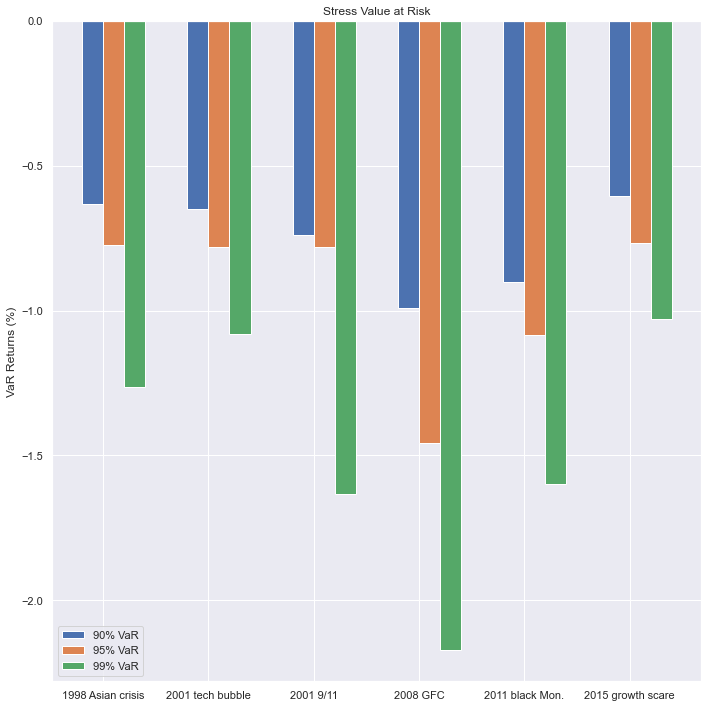

In [44]:
labels = ['1998 Asian crisis', '2001 tech bubble', '2001 9/11', '2008 GFC', \
          '2011 black Mon.', '2015 growth scare']

VaR_90 = [AsianCrisis_90, techBubble_90, crisis911_90, subprimeRecession_90, summer2011_90, growthScare_90]
VaR_95 = [AsianCrisis_95, techBubble_95, crisis911_95, subprimeRecession_95, summer2011_95, growthScare_95]
VaR_99 = [AsianCrisis_99, techBubble_99, crisis911_99, subprimeRecession_99, summer2011_99, growthScare_99]

VaR_90 = [100 * VaR_90[i][0] for i in range(len(VaR_90))]
VaR_95 = [100 * VaR_95[i][0] for i in range(len(VaR_95))]
VaR_99 = [100 * VaR_99[i][0] for i in range(len(VaR_99))]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, VaR_90, width, label='90% VaR')
rects2 = ax.bar(x + width/2, VaR_95, width, label='95% VaR')
rects2 = ax.bar(x + width*1.5, VaR_99, width, label='99% VaR')

ax.set_ylabel('VaR Returns (%)')
ax.set_title('Stress Value at Risk')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

In [45]:
labels = ['1998 Asian crisis', '2001 tech bubble', '2001 9/11', '2008 GFC', \
          '2011 black Mon.', '2015 growth scare']

VaR_90 = [AsianCrisis_90, techBubble_90, crisis911_90, subprimeRecession_90, summer2011_90, growthScare_90]
VaR_95 = [AsianCrisis_95, techBubble_95, crisis911_95, subprimeRecession_95, summer2011_95, growthScare_95]
VaR_99 = [AsianCrisis_99, techBubble_99, crisis911_99, subprimeRecession_99, summer2011_99, growthScare_99]

VaR_90 = [round(100 * VaR_90[i][0], 3) for i in range(len(VaR_90))]
VaR_95 = [round(100 * VaR_95[i][0], 3) for i in range(len(VaR_95))]
VaR_99 = [round(100 * VaR_99[i][0], 3) for i in range(len(VaR_99))]

SVaR = pd.DataFrame([VaR_90, VaR_95, VaR_99])
SVaR.columns = labels
SVaR.index = ['90% VaR', '95% VaR', '99% VaR']
SVaR

,1998 Asian crisis,2001 tech bubble,2001 9/11,2008 GFC,2011 black Mon.,2015 growth scare
90% VaR,-0.632,-0.649,-0.740,-0.992,-0.900,-0.604
95% VaR,-0.775,-0.780,-0.780,-1.458,-1.085,-0.769
99% VaR,-1.265,-1.080,-1.634,-2.171,-1.597,-1.030
